In [1]:
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from sklearn.model_selection import GridSearchCV,  validation_curve

figure(figsize=(8, 6), dpi=600)

<Figure size 4800x3600 with 0 Axes>

<Figure size 4800x3600 with 0 Axes>

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr, spearmanr

from sklearn import svm
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
tf.__version__

from keras.utils.vis_utils import plot_model
from keras import models
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
np.random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED']=str(42)


In [3]:
# Load the dataframe that was saved in read_files.py

def read_dataframe():
    default = False

    if default:
        df = pd.read_csv("tmp/df.csv", index_col=0)
        labels = ['mean Cd 200', 'mean Cd 400', 'mean Cd 600']
        q = df["mean Cd 200"].quantile(0.999)

    else:
        df = pd.read_csv("tmp/training_data.csv",  sep="\t")
        labels = ['cd', 'cl']

        df = df[(df["cd"] < 1) & (df["cd"]>-0.5)]
    return df



In [4]:
df = read_dataframe()
df.describe()

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,50.510934,7.429773,0.029741,0.637121
std,5.660414,4.464826,0.051227,0.377540
min,41.000000,0.000000,-0.218691,-0.432934
25%,45.500000,3.500000,0.009391,0.310711
50%,50.500000,7.500000,0.012202,0.662303
75%,55.500000,11.500000,0.024222,0.963150
max,60.000000,15.000000,0.704503,2.927380


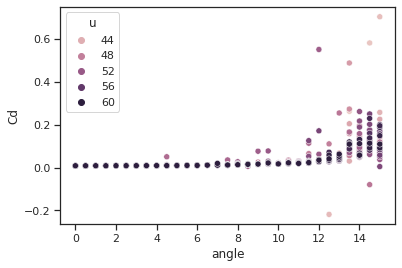

In [5]:
sns.color_palette("pastel")

# Exploration for outliers
sns.scatterplot(data=df,  x="angle", y= "cd", hue="u")
plt.ylabel("Cd")
#df.plot.scatter("angle","cl")
#df.plot.scatter("angle","cd")
plt.savefig("cd_vs_angle.png")



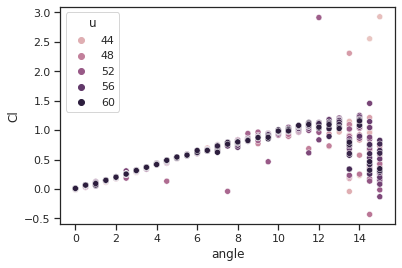

In [6]:
sns.scatterplot(data=df,  x="angle", y= "cl", hue="u")
plt.ylabel("Cl")
plt.savefig("cl_vs_angle.png")


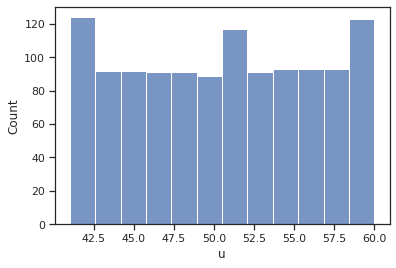

In [7]:
sns.histplot(data=df, x="u")
plt.savefig("u_hist.png")

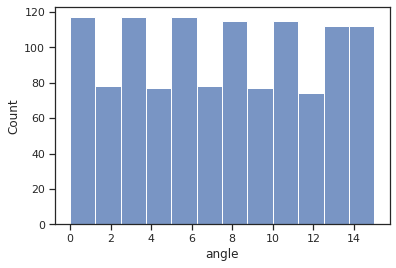

In [8]:
sns.histplot(data=df, x="angle")
plt.savefig("angle_hist.png")

In [9]:
df.describe()

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,50.510934,7.429773,0.029741,0.637121
std,5.660414,4.464826,0.051227,0.377540
min,41.000000,0.000000,-0.218691,-0.432934
25%,45.500000,3.500000,0.009391,0.310711
50%,50.500000,7.500000,0.012202,0.662303
75%,55.500000,11.500000,0.024222,0.963150
max,60.000000,15.000000,0.704503,2.927380


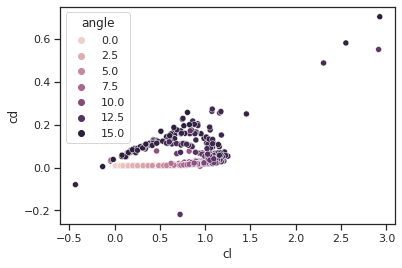

In [10]:
sns.scatterplot(data=df,  x="cl", y= "cd", hue="angle")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


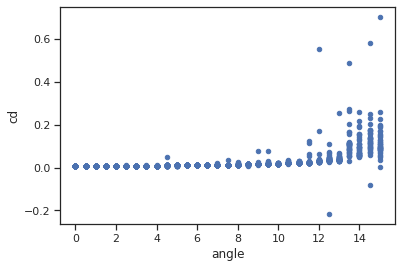

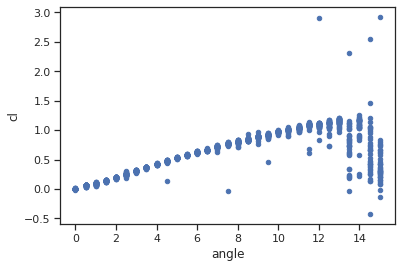

In [11]:
df.plot.scatter("angle","cd")
df.plot.scatter("angle","cl")

In [12]:
train, test = train_test_split(df, test_size=0.2)
train_features = train.copy()
test_features = test.copy()

In [13]:
# Remove the "mean Cd" column from the features and use it as label
labels = ["cl", "cd"]
train_labels = pd.concat([train_features.pop(x) for x in labels ], axis=1)
#train_labels = train_features.pop('mean Cd')
test_labels = pd.concat([test_features.pop(x) for x in labels], axis=1)
train.shape, test.shape

((951, 4), (238, 4))

                 u        angle           cd           cl
count  1189.000000  1189.000000  1189.000000  1189.000000
mean     50.510934     7.429773     0.029741     0.637121
std       5.660414     4.464826     0.051227     0.377540
min      41.000000     0.000000    -0.218691    -0.432934
25%      45.500000     3.500000     0.009391     0.310711
50%      50.500000     7.500000     0.012202     0.662303
75%      55.500000    11.500000     0.024222     0.963150
max      60.000000    15.000000     0.704503     2.927380


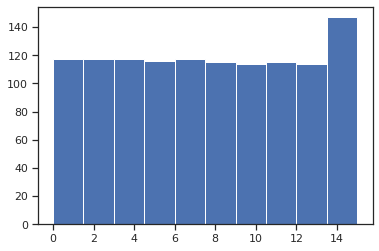

In [14]:
df = read_dataframe()
print(df.describe())
ss = RobustScaler()
#plt.hist(df["u"])
#plt.show()
plt.hist(df["angle"])

df[["u"]] = ss.fit_transform(df[["u"]])
df[["angle"]] = ss.fit_transform(df[["angle"]])

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.001093,-0.008778,0.029741,0.637121
std,0.566041,0.558103,0.051227,0.377540
min,-0.950000,-0.937500,-0.218691,-0.432934
25%,-0.500000,-0.500000,0.009391,0.310711
50%,0.000000,0.000000,0.012202,0.662303
75%,0.500000,0.500000,0.024222,0.963150
max,0.950000,0.937500,0.704503,2.927380


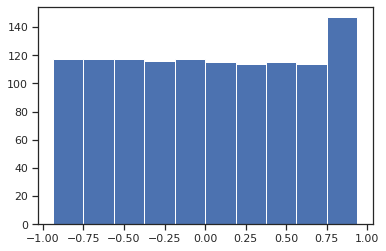

In [15]:
#plt.hist(df["u"])
plt.show()
plt.hist(df["angle"])

df.describe()

In [16]:
# Manual Scaler
if True:
    for features in [train_features, test_features]:
        for column in ["u", "angle"]:
            features[column] /= features[column].max() 

print(train_features.describe())
print(test_features.describe())

                u       angle
count  951.000000  951.000000
mean     0.842560    0.490641
std      0.094945    0.297942
min      0.683333    0.000000
25%      0.758333    0.233333
50%      0.841667    0.500000
75%      0.925000    0.733333
max      1.000000    1.000000
                u       angle
count  238.000000  238.000000
mean     0.839006    0.514006
std      0.092025    0.296392
min      0.683333    0.000000
25%      0.758333    0.266667
50%      0.837500    0.500000
75%      0.922917    0.800000
max      1.000000    1.000000


In [19]:
n_layers = 8
n_nodes = 16

In [20]:
model = models.Sequential()


In [21]:
model.add(layers.Dense(n_nodes, activation="relu", input_shape=(2,)))

model.add(layers.Dense(n_nodes, activation="tanh"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(n_nodes, activation="tanh"))


model.add(layers.Dense(n_nodes, activation="tanh"))
model.add(layers.Dense(1))



In [22]:
model.compile(optimizer="Adam", loss='mean_squared_error')


In [23]:
all_layers = [layers.Dense(n_nodes, activation="relu", name="hidden_layer_"+str(i)) for i in np.arange(n_layers)]
#all_layers.append(layers.Dense(n_nodes, activation="tanh"))
all_layers.append(layers.Dropout(0.5))
all_layers.append(layers.Dense(n_nodes, activation="tanh"))
all_layers.append(layers.Dropout(0.5))

all_layers.append(layers.Dense(2, name="output_layer"))

model = Sequential(all_layers)

# Compile the model to static graph
model.compile(optimizer="Adam", loss='mean_squared_error')

In [24]:
#from tensorflow.keras.applications import Xception
#model = Xception(include_top=False, input_shape=(2,))

In [25]:
label = "cd"

history = model.fit(
    train_features, train_labels,
    epochs=100,
    batch_size = 200,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4/4 [==============================] - 0s 67ms/step - loss: 0.2418 - val_loss: 0.2563
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2046 - val_loss: 0.2166
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1809 - val_loss: 0.1756
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1613 - val_loss: 0.1414
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1412 - val_loss: 0.1199
Epoch 6/100
4/4 [=

4/4 [==============================] - 0s 14ms/step - loss: 0.0412 - val_loss: 0.0536
Epoch 77/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0469 - val_loss: 0.0523
Epoch 78/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0459 - val_loss: 0.0583
Epoch 79/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0430 - val_loss: 0.0541
Epoch 80/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0413 - val_loss: 0.0521
Epoch 81/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0441 - val_loss: 0.0537
Epoch 82/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0401 - val_loss: 0.0505
Epoch 83/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0469 - val_loss: 0.0507
Epoch 84/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0392 - val_loss: 0.0552
Epoch 85/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0439 - val_loss: 0.0513
Epoch 86/100
4/4 [=====

===============================Test===============================
8/8 [==============================] - 0s 2ms/step - loss: 0.1874


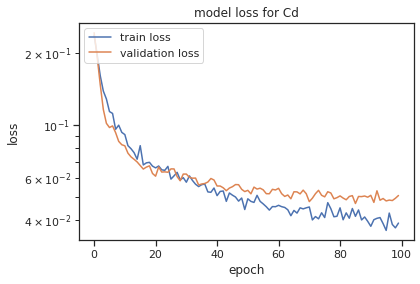

In [411]:
print("==================================================================")
print("===============================Test===============================")
eval_loss = model.evaluate(test_features,test_labels[label])

# Plot history of train and validation loss
plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])

plt.title(f'model loss for {label.capitalize()}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig("model_loss_"+str(n_nodes)+"_nodes_"+label+"_layer.png")


In [412]:

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0 (Dense)       (None, 16)                48        
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 16)                272       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 16)                272       
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 16)                272       
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 16)                272       
_________________________________________________________________
hidden_layer_5 (Dense)       (None, 16)                272       
_________________________________________________________________
hidden_layer_6 (Dense)       (None, 16)              

In [26]:
model.save('tmp/model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tmp/model/assets


In [27]:
predicted = model.predict(test_features)

In [29]:
from sklearn.metrics import r2_score

In [30]:
predicted[:,0].shape, test_labels["cd"].shape

((238,), (238,))

In [35]:
test_labels

,cl,cd
321,0.570157,0.010473
1177,0.308992,0.091809
926,0.682845,0.111972
86,1.075431,0.031457
955,1.178344,0.027694
...,...,...
612,1.118321,0.021223
839,0.111436,0.008507
225,0.424194,0.009673
1102,0.817101,0.016015


In [38]:
r2_score(test_labels["cl"], predicted[:,0])

0.7360073356047542

In [39]:
r2_score(test_labels["cd"], predicted[:,1])

0.023578634064697068

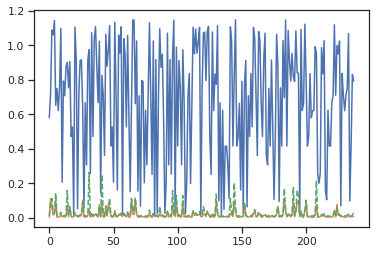

In [316]:
plt.plot(predicted)
plt.plot(test_labels["cd"].values, "--")
plt.savefig("cd.png")

In [425]:
def plot_XY(predictions, true_labels, label, fig_name="tmp"):
    fig, ax = plt.subplots()

    ax.scatter(predictions, true_labels, c="red" )
    ax.set_xlabel(f"predicted {label.capitalize()}")
    ax.set_ylabel(f"True {label.capitalize()}")
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    fig.savefig(fig_name + "_" + label + ".png")
    #plt.plot([0, 0.014])

In [421]:
predicted[:,0].shape, test_labels["cl"].shape

((238,), (238,))

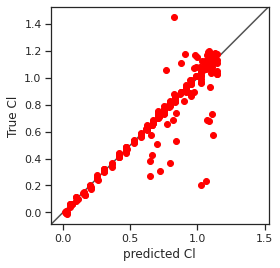

In [433]:
plot_XY(predicted[:,0], test_labels["cl"], "cl", "nn")

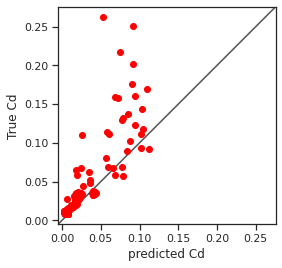

In [434]:
plot_XY(predicted[:,1], test_labels["cd"], "cd", "nn")

In [440]:
model.evaluate(test_features, test_labels)

8/8 [==============================] - 0s 929us/step - loss: 0.0183


0.018303638324141502

In [441]:
model.predict(x=[[51.4815, 0]])

array([[0.77248627, 0.07998118]], dtype=float32)

In [442]:
model.predict(x=[[51.4815, 5]])

array([[1.5205567 , 0.09801605]], dtype=float32)

In [443]:
model.predict(x=[[51.4815, 10]])

array([[1.9825028, 0.0673857]], dtype=float32)

In [444]:
model.predict(x=[[51.4815, 15]])

array([[2.3166971 , 0.05519081]], dtype=float32)

In [445]:
pearsonr(df.u, df.cl)

(-0.01691715977477141, 0.5600524495403806)

In [446]:
pearsonr(df.cd, df.angle), pearsonr(df.cl, df.angle)

((0.5288590998079238, 1.1952005957218042e-86),
 (0.7567027861850539, 2.4336089372461764e-221))

In [447]:

spearmanr(df.u, df.cl), spearmanr(df.angle, df.cl)

(SpearmanrResult(correlation=-0.0060553100775509235, pvalue=0.8347755264160439),
 SpearmanrResult(correlation=0.7847117937380877, pvalue=8.372612677257458e-249))

In [448]:
spearmanr(df.u, df.cd), spearmanr(df.angle, df.cd)

(SpearmanrResult(correlation=-0.03522951801888536, pvalue=0.2247939055351063),
 SpearmanrResult(correlation=0.9668150771270123, pvalue=0.0))

In [449]:
def run_ml(label="cd"):
    parameters = {"svm": {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10, 100, 100]},
              "knn": {"n_neighbors": range(1,21,2)},
              "rf" : {"n_estimators": range(3, 20)},
               
             }

    clfs = {"svm": svm.SVR(gamma=1), 
            "knn": KNeighborsRegressor(),
            "rf" : RandomForestRegressor(),

           }         
    best_clf = None
    best_score = -1

    

    for alg in ["svm", "knn", "rf"]:

        clf = GridSearchCV(clfs[alg], parameters[alg], cv=10, scoring="r2")
        clf.fit(train_features, train_labels[label])
        score = clf.score(test_features, test_labels[label])
        if score > best_score:
            best_score = score
            best_clf = clf.best_estimator_
        print(f" alg: {alg} , score: {score}")

    print(best_clf)
    predictions = best_clf.predict(test_features)
    return predictions

 alg: svm , score: 0.864362820081347
 alg: knn , score: 0.8751841244272703
 alg: rf , score: 0.8494751973934769
KNeighborsRegressor(n_neighbors=15)


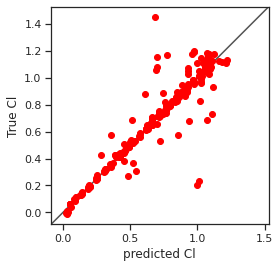

In [451]:
predictions = run_ml("cl")
plot_XY(predictions, test_labels["cl"], label="cl", fig_name="ml_cl.png")


 alg: svm , score: -0.5338087663047544
 alg: knn , score: 0.612895891178741
 alg: rf , score: 0.5443510028122782
KNeighborsRegressor(n_neighbors=19)


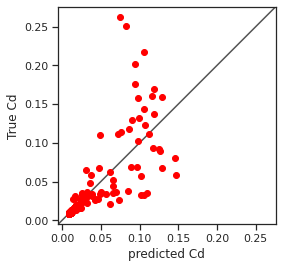

In [453]:
predictions = run_ml("cd")
plot_XY(predictions, test_labels["cd"], label="cd", fig_name="ml_cd.png")


In [ ]:
best_clf

In [ ]:
#plot.savefig("c")

In [ ]:
clf.fit(train_features, train_labels["cd"])

In [ ]:
svm_predict = clf.predict(test_features)

In [ ]:
plt.plot(svm_predict)
plt.plot(test_labels["cd"].values, "--")
plt.savefig("svr_cd.png")

In [ ]:
clf.estimator.get_params()

In [ ]:
test_features.shape, test_labels.shape

In [ ]:
clf.score(test_features, test_labels["cd"])

In [116]:
result= [test_features, test_labels,]
result = test_features.join(test_labels)
svm_df  =pd.DataFrame(svm_predict, columns=["predicted"])
result = result.reset_index()
result= result.join(svm_df)
result.head()

,index,u,angle,cl,cd,predicted
0,321,0.766667,0.366667,0.570157,0.010473,-0.045211
1,1177,0.991667,1.000000,0.308992,0.091809,0.117792
2,926,0.925000,0.900000,0.682845,0.111972,0.132816
3,86,0.700000,0.800000,1.075431,0.031457,0.106795
4,955,0.933333,0.833333,1.178344,0.027694,0.127424


SyntaxError: invalid syntax (<ipython-input-130-08910ef72277>, line 1)

In [98]:
clf.estimator.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

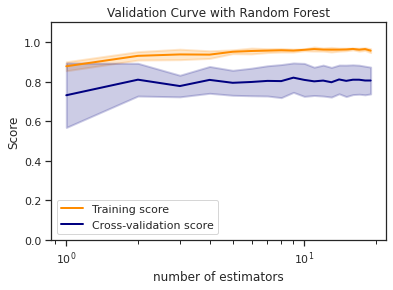

In [460]:
X = df[["u", "angle"]].values
y = df[["cl"]].values.ravel()
#param_range = np.logspace(0, 3, 8)
param_range = np.logspace(-5, 4, 8)
param_range = range(1, 20)
lw = 2
plt.title("Validation Curve with Random Forest")
plt.xlabel(r"number of estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
train_scores, test_scores = validation_curve(
    clf.estimator,X, y, param_name="n_estimators", param_range=param_range,
    scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("randomforest_alidation.png")
plt.show()


array([[<AxesSubplot:xlabel='u', ylabel='u'>,
        <AxesSubplot:xlabel='angle', ylabel='u'>,
        <AxesSubplot:xlabel='cd', ylabel='u'>,
        <AxesSubplot:xlabel='cl', ylabel='u'>],
       [<AxesSubplot:xlabel='u', ylabel='angle'>,
        <AxesSubplot:xlabel='angle', ylabel='angle'>,
        <AxesSubplot:xlabel='cd', ylabel='angle'>,
        <AxesSubplot:xlabel='cl', ylabel='angle'>],
       [<AxesSubplot:xlabel='u', ylabel='cd'>,
        <AxesSubplot:xlabel='angle', ylabel='cd'>,
        <AxesSubplot:xlabel='cd', ylabel='cd'>,
        <AxesSubplot:xlabel='cl', ylabel='cd'>],
       [<AxesSubplot:xlabel='u', ylabel='cl'>,
        <AxesSubplot:xlabel='angle', ylabel='cl'>,
        <AxesSubplot:xlabel='cd', ylabel='cl'>,
        <AxesSubplot:xlabel='cl', ylabel='cl'>]], dtype=object)

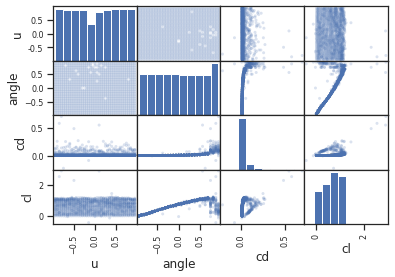

In [456]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [1194]:
svm_predict

array([0.48325979, 0.43583053, 0.90890115, 1.15164116, 1.05715723,
       0.49217309, 0.72545397, 0.53778329, 0.71237093, 1.11943506,
       0.24374319, 0.7798639 , 0.65965111, 0.90913206, 0.86680063,
       0.71438094, 0.8608082 , 0.40240175, 0.44573651, 0.06751735,
       1.09007086, 0.97657003, 0.11087147, 0.64932903, 0.97135637,
       0.97531659, 0.51062886, 0.12048468, 0.5890394 , 0.30249949,
       0.97056877, 1.01375694, 0.27112705, 1.12533894, 0.40172314,
       1.15775077, 1.092352  , 0.90906965, 0.5884582 , 0.94950034,
       0.19839404, 0.63464316, 0.65144018, 0.33244295, 0.91813757,
       0.92312589, 0.78439812, 0.90588091, 0.36256589, 0.44137915,
       0.24340043, 0.99894261, 0.64877217, 0.2115368 , 1.13681053,
       1.04217501, 1.09070031, 0.07576833, 1.15397698, 1.02188273,
       0.44097398, 1.13526853, 0.48666398, 0.20840085, 0.50418806,
       1.05665453, 1.05643276, 0.47634428, 1.09116339, 0.20993439,
       0.66361373, 0.1330272 , 0.78346808, 0.79414449, 0.24228